#  Actividad | Visualización

### Integrantes

Alumno: **Erick de Jesus Hernández Cerecedo**  
Matricula: **A01066428**

### Información del Curso

Nombre: **Ciencia y analítica de datos**  
Profesor: **Jobish Vallikavungal Devassia**

Fechas: **Martes 1 de noviembre de 2022**

---

### 1. Descarga de datos 

Descarga los datosEnlaces a un sitio externo. y carga el dataset en tu libreta. Descripción aquí. 

In [325]:
# Importar la librerias necesarias para la actividad
import pandas as pd
import numpy as np
import requests
import os

# URL de la base de datos
path = 'default of credit card clients.csv'
# url='https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

# # Peticion de los datos
# r=requests.get(url)

# # Guardamos los datos en un archivo local con el mismo nombre
# path=os.path.join(os.getcwd(),'default of credit card clients.csv')  # Obtenemos la direccion del archivo local para guardar la bd
# with open(path,'wb') as f:                                                   # Crear archivo de datos
#     f.write(r.content)                                                       # Escribir archivo de datos

# Lectura de los datos obtenios CSV
data = pd.read_csv(path)

In [326]:
# Visualización del dataframe
data.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


### 2. Información del DataFrame

Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [327]:
# Información de los datos
print("INFROMACIÓN DE DATAFRAME -----------------")

# shape: forma que tienes el dataframe
print("\nShape: ", data.shape)

# columns: Nombres de las columnas que tiene el dataframe
print("\nColumns: \n", data.columns)

# dtypes: Tipos de datos por cada feature
print("\nDtypes: \n", data.dtypes)

# info: Informacion del dataframe
print("\nInfo: ")
print(data.info())

# isna: Validacion si existen Null or NAN en el dataframe
print("\nIsna: ")
print(data.isna())

print("\n----------------- FIN PARTE 2 -----------------")

INFROMACIÓN DE DATAFRAME -----------------

Shape:  (30000, 25)

Columns: 
 Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

Dtypes: 
 ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29

### 3. Limpieza de los datos

Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [328]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from pandas import isnull

# Validación si hay valores Null o NaN
print("LIMPIEZA DE DATOS ------------------\n")
print("Validacion de datos NaN y Null")
print("Null values: ", data.isnull().values.any())
print("NaN  values: ", data.isna().values.any())

# Eliminado de la columna ID
data.drop(columns=['ID'], inplace=True)

# Eliminando filas con Na en Y
data = data.dropna(subset=['Y'])

# Lista de variables Numericas
numericas = ['X1','X5','X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']

# Lista de variables Categoricas
categoricas = ['X2', 'X3', 'X4', 'X6', 'X7', 'X8','X9','X10','X11', 'Y']

# Reemplazo de datos NaN por media de la columna usando el Simple Imputer
# pipeline_numericas = Pipeline(steps=[('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')), ('escalar', StandardScaler())]) 
# pipeline_categoricas = Pipeline(steps=[('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))]) 
pipeline_numericas = SimpleImputer(missing_values=np.nan, strategy='mean')
pipeline_categoricas = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# transformation = ColumnTransformer(
#     transformers=[
#         ('pipeline_numericas', pipeline_numericas, numericas),
#         ('pipeline_categoricas', pipeline_categoricas, categoricas),
#     ],
#     remainder='passthrough'
# )

# Transformaciones con fit y transform
data[numericas] = pipeline_numericas.fit_transform(data[numericas])
data[categoricas] = pipeline_categoricas.fit_transform(data[categoricas])

# Validación si hay valores Null o NaN
print("\nValidacion de limpieza")
print("Null values: ", data.isnull().values.any())
print("NaN  values: ", data.isna().values.any())

print("\n----------------- FIN PARTE 3 -----------------")

LIMPIEZA DE DATOS ------------------

Validacion de datos NaN y Null
Null values:  True
NaN  values:  True

Validacion de limpieza
Null values:  False
NaN  values:  False

----------------- FIN PARTE 3 -----------------


In [329]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


### 4. Estadistica descriptiva, Tendencia Central y Dispersión 

Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [330]:
print("ESTADISTICA DESCRIPTIVA, TENDENCIA CENTRAL Y DISPERSIÓN  -----------------")

# Obtenemos la estadistica descriptiva
data.describe()


ESTADISTICA DESCRIPTIVA, TENDENCIA CENTRAL Y DISPERSIÓN  -----------------


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,...,29997.000000,29997.000000,29997.000000,29997.000000,2.999700e+04,29997.0000,29997.000000,29997.000000,29997.000000,29997.000000
mean,167496.072274,1.603794,1.853085,1.551955,35.483862,-0.016768,-0.133813,-0.166517,-0.220822,-0.266293,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.6234,4827.252526,4800.297209,5216.259977,0.221189
std,129748.803871,0.489116,0.790317,0.521963,9.217346,1.123708,1.197088,1.195840,1.168970,1.132990,...,64332.627970,60795.792438,59554.362815,16562.784500,2.304187e+04,17606.9550,15666.662390,15278.804216,17778.255642,0.415054
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.0000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2332.000000,1768.000000,1257.000000,1000.000000,8.360000e+02,390.0000,298.000000,254.000000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19064.000000,18122.000000,17098.000000,2100.000000,2.010000e+03,1800.0000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54515.000000,50180.000000,49205.000000,5006.000000,5.000000e+03,4510.0000,4016.000000,4040.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.0000,621000.000000,426529.000000,528666.000000,1.000000


data.columns

In [331]:

print("\n----------------- FIN PARTE 4 -----------------")


----------------- FIN PARTE 4 -----------------


### 5. Conteo de variables categoricas

Realiza el conteo de las variables categóricas

In [332]:
print("CONTEO DE VARIABLES CATEGÓRICAS  -----------------")
# Conteo de las variables categoricas

for column in categoricas:
    print("\n", pd.value_counts(data[column]))
    # print(pd.DataFrame(data[column].value_counts()))

print("\n----------------- FIN PARTE 5 -----------------")

CONTEO DE VARIABLES CATEGÓRICAS  -----------------

 2.0    18112
1.0    11885
Name: X2, dtype: int64

 2.0    14030
1.0    10584
3.0     4915
5.0      280
4.0      123
6.0       51
0.0       14
Name: X3, dtype: int64

 2.0    15965
1.0    13655
3.0      323
0.0       54
Name: X4, dtype: int64

  0.0    14738
-1.0     5684
 1.0     3688
-2.0     2759
 2.0     2665
 3.0      322
 4.0       76
 5.0       26
 8.0       19
 6.0       11
 7.0        9
Name: X6, dtype: int64

  0.0    15732
-1.0     6047
 2.0     3925
-2.0     3782
 3.0      326
 4.0       99
 1.0       28
 5.0       25
 7.0       20
 6.0       12
 8.0        1
Name: X7, dtype: int64

  0.0    15767
-1.0     5935
-2.0     4085
 2.0     3817
 3.0      240
 4.0       76
 7.0       27
 6.0       23
 5.0       21
 1.0        4
 8.0        2
Name: X8, dtype: int64

  0.0    16457
-1.0     5685
-2.0     4348
 2.0     3156
 3.0      180
 4.0       69
 7.0       58
 5.0       35
 6.0        5
 1.0        2
 8.0        2
Name: X9, dt

In [333]:
X = data.drop(columns=['Y'])
y = data['Y']

### 6. Escalado de Datos

Escala los datos, si consideras necesario

In [334]:
print("ESCALADO DE DATOS  -----------------")

# Importacion de la libreria StandarScaler para el escalado de datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[numericas] = scaler.fit_transform(X[numericas])

print("\n----------------- FIN PARTE 6 -----------------")
X.head()




ESCALADO DE DATOS  -----------------

----------------- FIN PARTE 6 -----------------


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,-1.136801,2.0,2.0,1.0,-1.245918,2.0,2.0,-1.0,-1.0,-2.0,...,-0.668170,-0.672697,-0.663289,-0.652879,-0.341914,-0.227133,-0.296798,-0.308128,-0.314185,-0.293412
1,-0.366068,2.0,2.0,2.0,-1.028932,-1.0,2.0,0.0,0.0,0.0,...,-0.639431,-0.621836,-0.606458,-0.598121,-0.341914,-0.213636,-0.240001,-0.244297,-0.314185,-0.180913
2,-0.597288,2.0,2.0,2.0,-0.160989,0.0,0.0,0.0,0.0,0.0,...,-0.482585,-0.449929,-0.417412,-0.391785,-0.250261,-0.191936,-0.240001,-0.244297,-0.248734,-0.012164
3,-0.905581,2.0,2.0,1.0,0.164490,0.0,0.0,0.0,0.0,0.0,...,0.032671,-0.232571,-0.186949,-0.156736,-0.221159,-0.169411,-0.228642,-0.237914,-0.244218,-0.237162
4,-0.905581,1.0,2.0,1.0,2.334348,-1.0,0.0,-1.0,0.0,0.0,...,-0.161365,-0.347196,-0.348360,-0.331638,-0.221159,1.334919,0.271169,0.266350,-0.269089,-0.255218


### 7. Reducción de dimensiones

Reduce las dimensiones con PCA, si consideras necesario.
1. Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%
2. Indica la importancia de las variables en cada componente

In [335]:
summary = {
    "Varianzas: ": X.var().round(2),
    "Valor Min: ": X.min().round(2),
    "valor Max: ": X.max().round(2)
}

pd.DataFrame(summary).transpose()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
Varianzas:,1.00,0.24,0.62,0.27,1.00,1.26,1.43,1.43,1.37,1.28,...,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00
Valor Min:,-1.21,1.00,0.00,0.00,-1.57,-2.00,-2.00,-2.00,-2.00,-2.00,...,-2.95,-3.32,-2.00,-6.36,-0.34,-0.26,-0.3,-0.31,-0.31,-0.29
valor Max:,6.42,2.00,6.00,3.00,4.72,8.00,8.00,8.00,8.00,8.00,...,23.32,13.19,14.59,15.50,52.40,72.84,50.6,39.33,27.60,29.44


In [336]:
# Varianza total de todas las variables
varianzaTotal = X.var().sum()

# Varianza de cada variable
varianzas = list()
for i, col in enumerate(X.columns):
    varianzas.append({
        'Nombre': col,
        'Varianza': X[col].var()
    })
    

#Porcentaje que representa la varianza de cada variable respecto al total.
print('Varianza Total: ', varianzaTotal.round(2) )

sumaPorcentajes = 0
for varianza in varianzas:
    sumaPorcentajes += ((varianza['Varianza']/varianzaTotal)*100).round(2)
    print(varianza['Nombre'] + ': \t' ,  ((varianza['Varianza']/varianzaTotal)*100).round(2),'%' )
    
print('Porcentaje de Varianza de Variables: ', sumaPorcentajes)

Varianza Total:  23.23
X1: 	 4.3 %
X2: 	 1.03 %
X3: 	 2.69 %
X4: 	 1.17 %
X5: 	 4.3 %
X6: 	 5.43 %
X7: 	 6.17 %
X8: 	 6.15 %
X9: 	 5.88 %
X10: 	 5.52 %
X11: 	 5.69 %
X12: 	 4.3 %
X13: 	 4.3 %
X14: 	 4.3 %
X15: 	 4.3 %
X16: 	 4.3 %
X17: 	 4.3 %
X18: 	 4.3 %
X19: 	 4.3 %
X20: 	 4.3 %
X21: 	 4.3 %
X22: 	 4.3 %
X23: 	 4.3 %
Porcentaje de Varianza de Variables:  99.92999999999996


In [337]:
from sklearn.decomposition import PCA

reduccion = PCA()

X_reducida = reduccion.fit_transform(X)

summary = pd.DataFrame({
    'Varianza Explicada': np.round(reduccion.explained_variance_ratio_,2) * 100, # Obtenemos el Porcentaje de varianza explicada por cada componente
    'Varianza Acumulada': np.cumsum(reduccion.explained_variance_ratio_) * 100 # Obtenemos el acumulado de la varianza por cada componente.
})

filas = [f'PC{i + 1}' for i in range(len(X.columns))]
summary.index = filas

summary.transpose()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Varianza Explicada,31.000000,21.000000,7.000000,5.000000,4.000000,4.00000,4.00000,4.000000,3.000000,3.000000,...,2.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.0
Varianza Acumulada,31.440887,52.118888,58.765027,63.522144,67.636616,71.47465,75.26266,79.028949,82.415304,85.595193,...,94.444377,95.59892,96.682231,97.697727,98.562302,99.313087,99.61541,99.791098,99.900061,100.0


In [338]:
X_componentes = pd.DataFrame(X_reducida, columns = filas) 

print("Varianza total variables originales: ", X.var().sum().round(5))
print("Varianza total de los componentes: ", X_componentes.var().sum().round(5))

Varianza total variables originales:  23.23486
Varianza total de los componentes:  23.23486


In [339]:
summaryaux = {
    'Desviacion Estandar': np.sqrt(reduccion.explained_variance_),
    'Proporcion de Varianza': reduccion.explained_variance_ratio_,
    'Proporcion acumulativa': np.cumsum(reduccion.explained_variance_ratio_)
}
pcsSummary = pd.DataFrame(summaryaux)[0:8].transpose()
pcsSummary = pcsSummary.round(2)
pcsSummary.columns = X_componentes.columns[0:8]
pcsSummary

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Desviacion Estandar,2.70,2.19,1.24,1.05,0.98,0.94,0.94,0.94
Proporcion de Varianza,0.31,0.21,0.07,0.05,0.04,0.04,0.04,0.04
Proporcion acumulativa,0.31,0.52,0.59,0.64,0.68,0.71,0.75,0.79


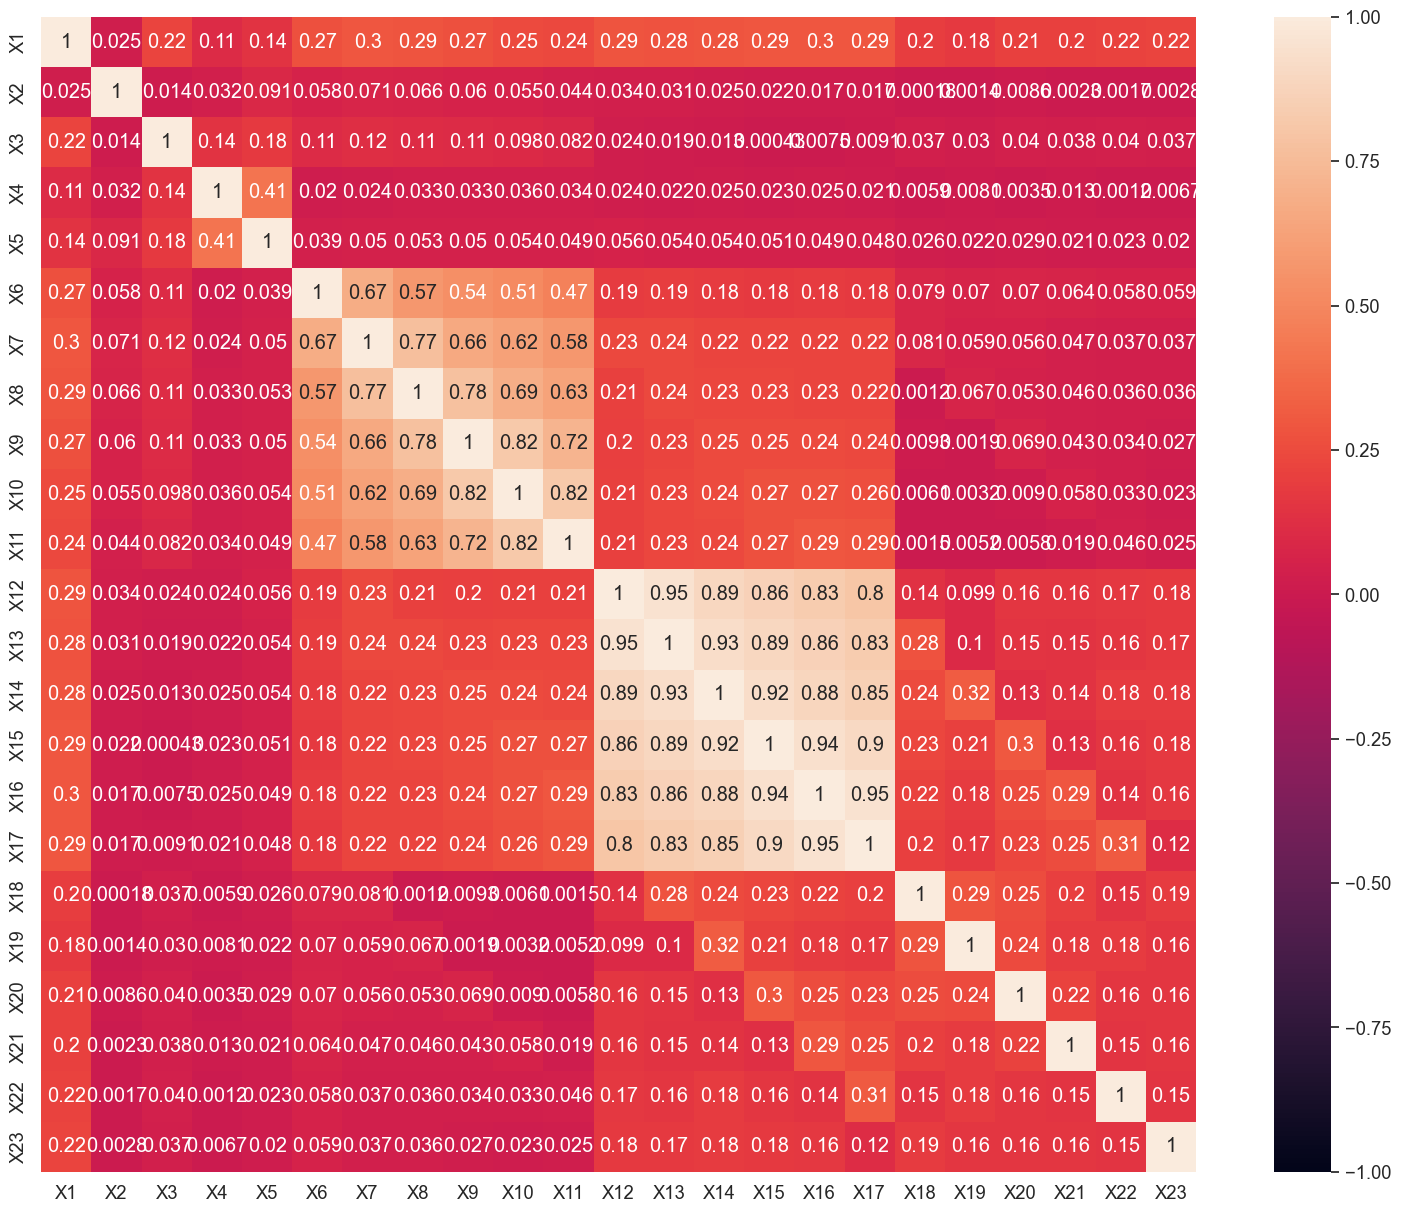

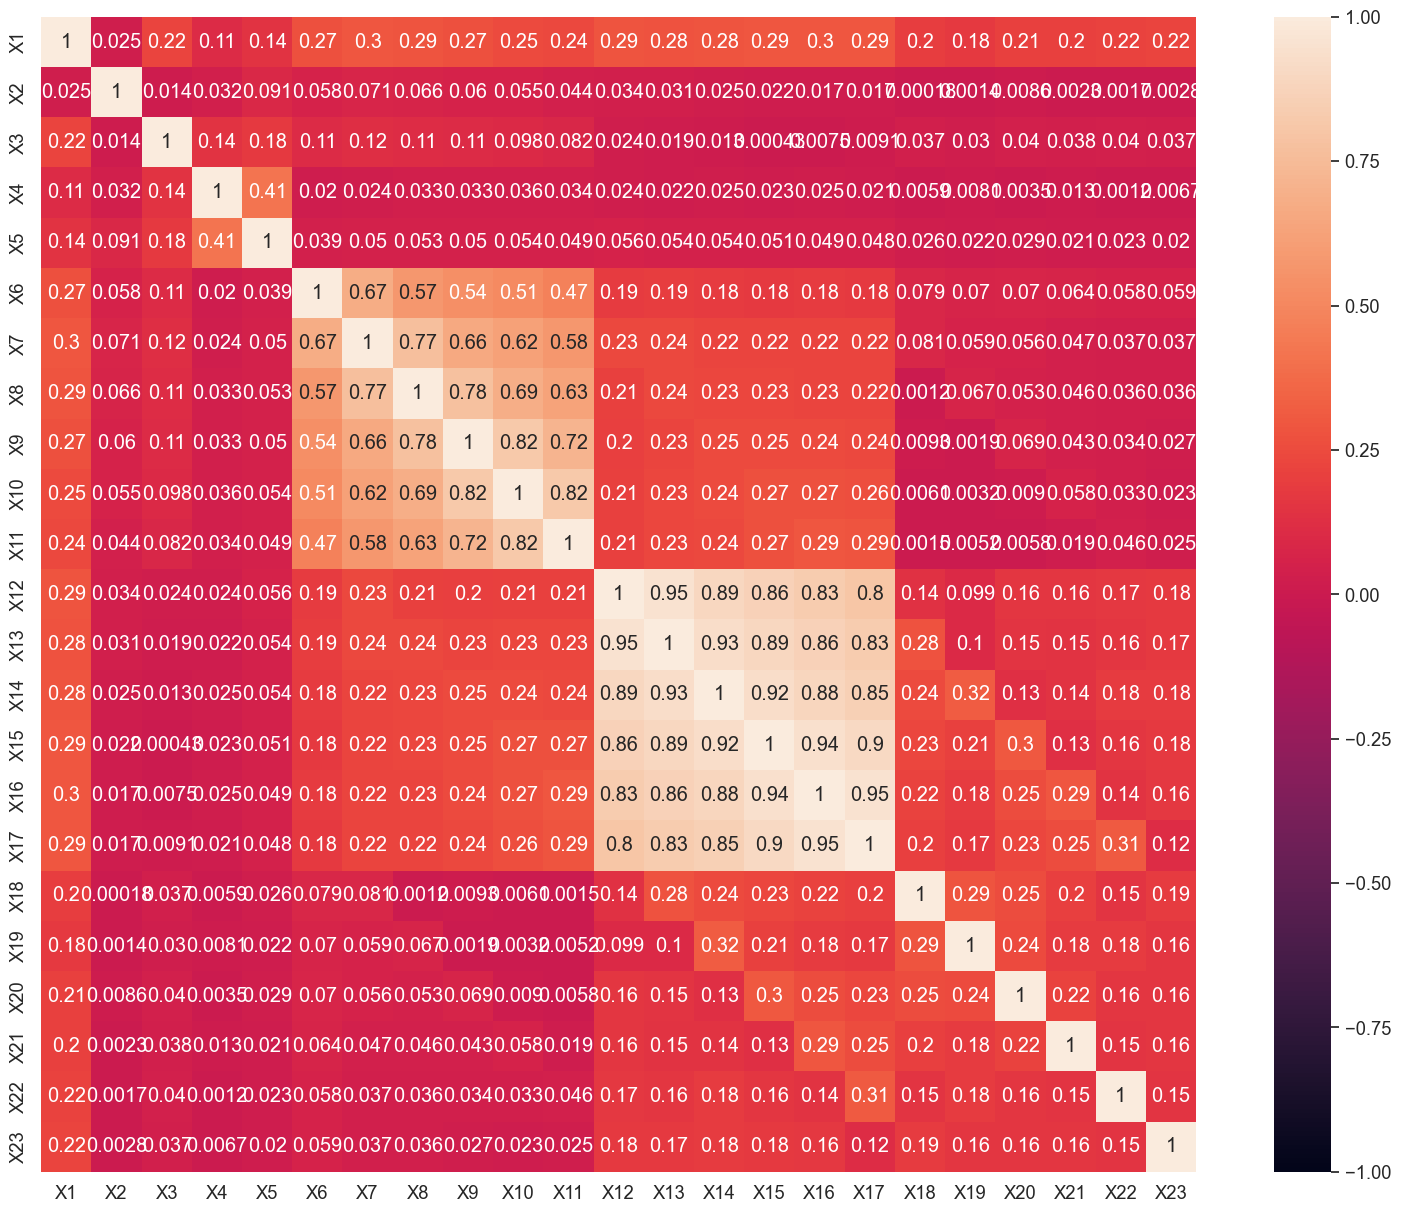

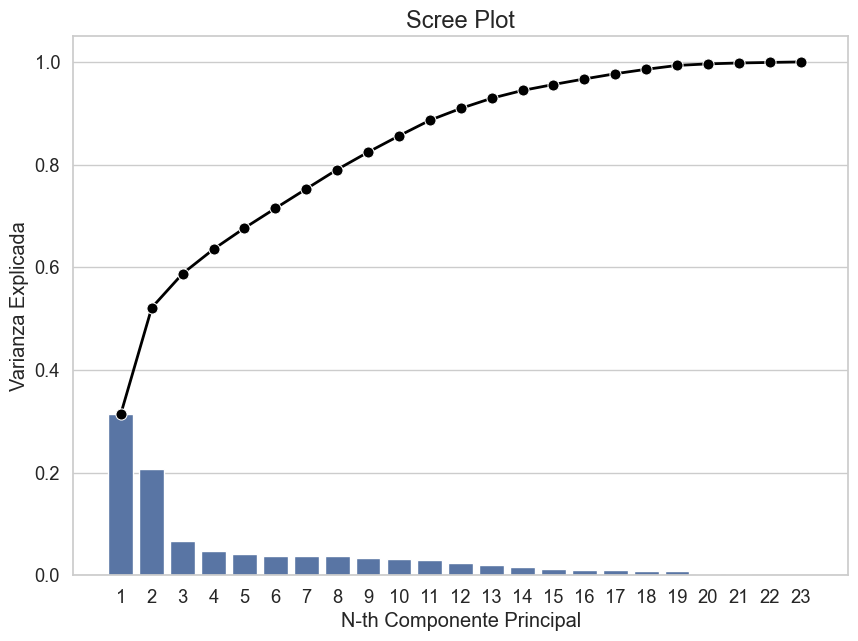

In [340]:
# Generamos un arreglo con el numero de los componentes
pc_components = np.arange(reduccion.n_components_) + 1

# El Acumulado del radio de la varianza en pcs
cusm = np.cumsum(reduccion.explained_variance_ratio_)

# La variancia por cada componente principal
vartio = reduccion.explained_variance_ratio_

# Immportacion de librerias para graficar
import seaborn as sns
import matplotlib.pyplot as plt

scree = sns.set(style = 'whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize = (10, 7))
scree = sns.barplot(x = pc_components, y = vartio, color='b')
scree = sns.lineplot(x = pc_components - 1,
                    y = cusm,
                    color = 'black',
                    linestyle = '-',
                    linewidth = 2,
                    marker = 'o',
                    markersize = 8)
scree.set_title('Scree Plot', fontsize = 17)
scree.set(xlabel='N-th Componente Principal', ylabel='Varianza Explicada')
plt.show()


In [341]:

# Matriz de covarianza
covarianza_matiz = np.cov(X.T)

#Calculamos los autovalores y autovectores de la matriz y los mostramos
eigenvalue, eigenvector = np.linalg.eig(covarianza_matiz)

print('Eigenvectors \n%s' %eigenvector)
print('\nEigenvalues \n%s' %eigenvalue)

Eigenvectors 
[[-2.49713060e-03 -2.92983950e-01 -8.65089853e-02  1.03621536e-01
   9.21927698e-02  5.17594054e-02 -3.02519246e-01  6.39830918e-02
  -7.78940770e-02  6.57549473e-01  3.18267979e-03 -7.03727150e-02
   5.76991334e-01 -9.86096899e-03 -1.45303793e-02 -2.77532417e-03
  -5.85885347e-04  7.46261396e-02 -8.80106499e-03  3.82835610e-02
  -6.36767831e-02 -3.60297846e-02  6.40150407e-03]
 [-1.12279889e-02 -7.52134278e-03  2.57216841e-03 -4.48848547e-02
  -9.83066687e-03  7.07673979e-04 -8.56757390e-03 -2.35676839e-03
   6.85746906e-03 -2.04156532e-02 -2.07803411e-03  8.08707831e-03
   9.74349462e-02  4.78408042e-03  1.58385174e-03 -1.87546526e-03
  -1.76902893e-03  1.88709006e-02  2.45313260e-02  4.66566779e-01
   6.97712859e-01  4.66382103e-01  2.54170976e-01]
 [ 2.55534623e-02  5.04732898e-02  5.39377939e-02  2.82273156e-01
  -3.35696887e-02 -4.30713542e-02  1.73479001e-01 -3.00145082e-02
   6.32933956e-02 -5.77132884e-01 -1.43355821e-02 -6.71362625e-02
   7.21776610e-01 -3.70068

In [342]:
#  Hacemos una lista de parejas (autovector, autovalor) 
eigenpairs = [(np.abs(eigenvalue[i]), eigenvector[:,i]) for i in range(len(eigenvalue))]

# Ordenamos estas parejas den orden descendiente con la función sort
eigenpairs.sort(key=lambda x: x[0], reverse=True)
    
# Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendiente:')
for i in eigenpairs:
    print(i[0])

Autovalores en orden descendiente:
7.305246219085278
4.8045047709404
1.544221123058335
1.1053093810579915
0.9559919651365707
0.8917618489653881
0.8801386955358247
0.8750919940245098
0.7868150502157258
0.7388426227842843
0.7058285998168216
0.5360600220037858
0.46046176168475006
0.3537453070580859
0.268256313376149
0.25170584966448745
0.23594901984251596
0.20088282596795748
0.17444391454568212
0.0702442761599057
0.040820931205504785
0.025317256730054766
0.023220777686931923


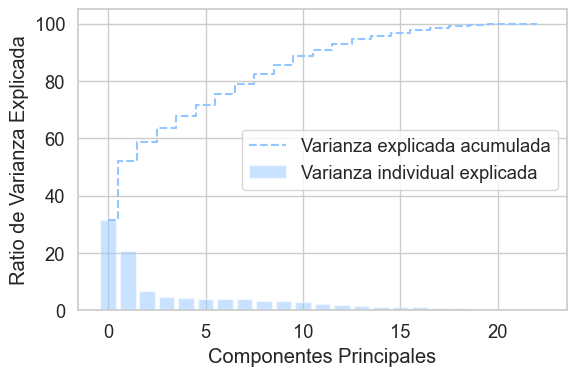

In [343]:


# A partir de los autovalores, calculamos la varianza explicada
varianza_explicada = [(i / sum(eigenvalue))*100 for i in sorted(eigenvalue, reverse=True)]
varainza_acumulada = np.cumsum(varianza_explicada)

# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
with plt.style.context('seaborn-pastel'):
        plt.figure(figsize=(6, 4))

        plt.bar(range(23), varianza_explicada, alpha=0.5, align='center',
                label='Varianza individual explicada')
        plt.step(range(23), varainza_acumulada, where='mid', linestyle='--', label='Varianza explicada acumulada')
        plt.ylabel('Ratio de Varianza Explicada')
        plt.xlabel('Componentes Principales')
        plt.legend(loc='best')
        plt.tight_layout()
        plt.show()

In [344]:
#Generamos la matríz a partir de los pares autovalor-autovector
matrix_proyeccion = np.hstack((eigenpairs[0][1].reshape(23,1),
                      eigenpairs[1][1].reshape(23,1)))

print('Matriz Proyección:\n', matrix_proyeccion)

Y = X.dot(matrix_proyeccion)


Matriz Proyección:
 [[-0.00249713 -0.29298395]
 [-0.01122799 -0.00752134]
 [ 0.02555346  0.05047329]
 [ 0.00141752  0.01678971]
 [-0.00071348 -0.05967907]
 [ 0.23757373  0.23279359]
 [ 0.30193249  0.2774146 ]
 [ 0.31171319  0.28521842]
 [ 0.31144084  0.27533648]
 [ 0.30175932  0.2507843 ]
 [ 0.29491808  0.2297577 ]
 [ 0.26755374 -0.24467318]
 [ 0.27802345 -0.24862753]
 [ 0.28086648 -0.25441452]
 [ 0.28492082 -0.25493083]
 [ 0.28367388 -0.25223821]
 [ 0.27780824 -0.24768047]
 [ 0.05675659 -0.15687619]
 [ 0.04478213 -0.14324989]
 [ 0.04913982 -0.15633252]
 [ 0.04348044 -0.14451438]
 [ 0.04194314 -0.1403282 ]
 [ 0.03904338 -0.13117254]]


### 8. Visualizacion de información en Histogramas

Elabora los histogramas de los atributos para visualizar su distribución

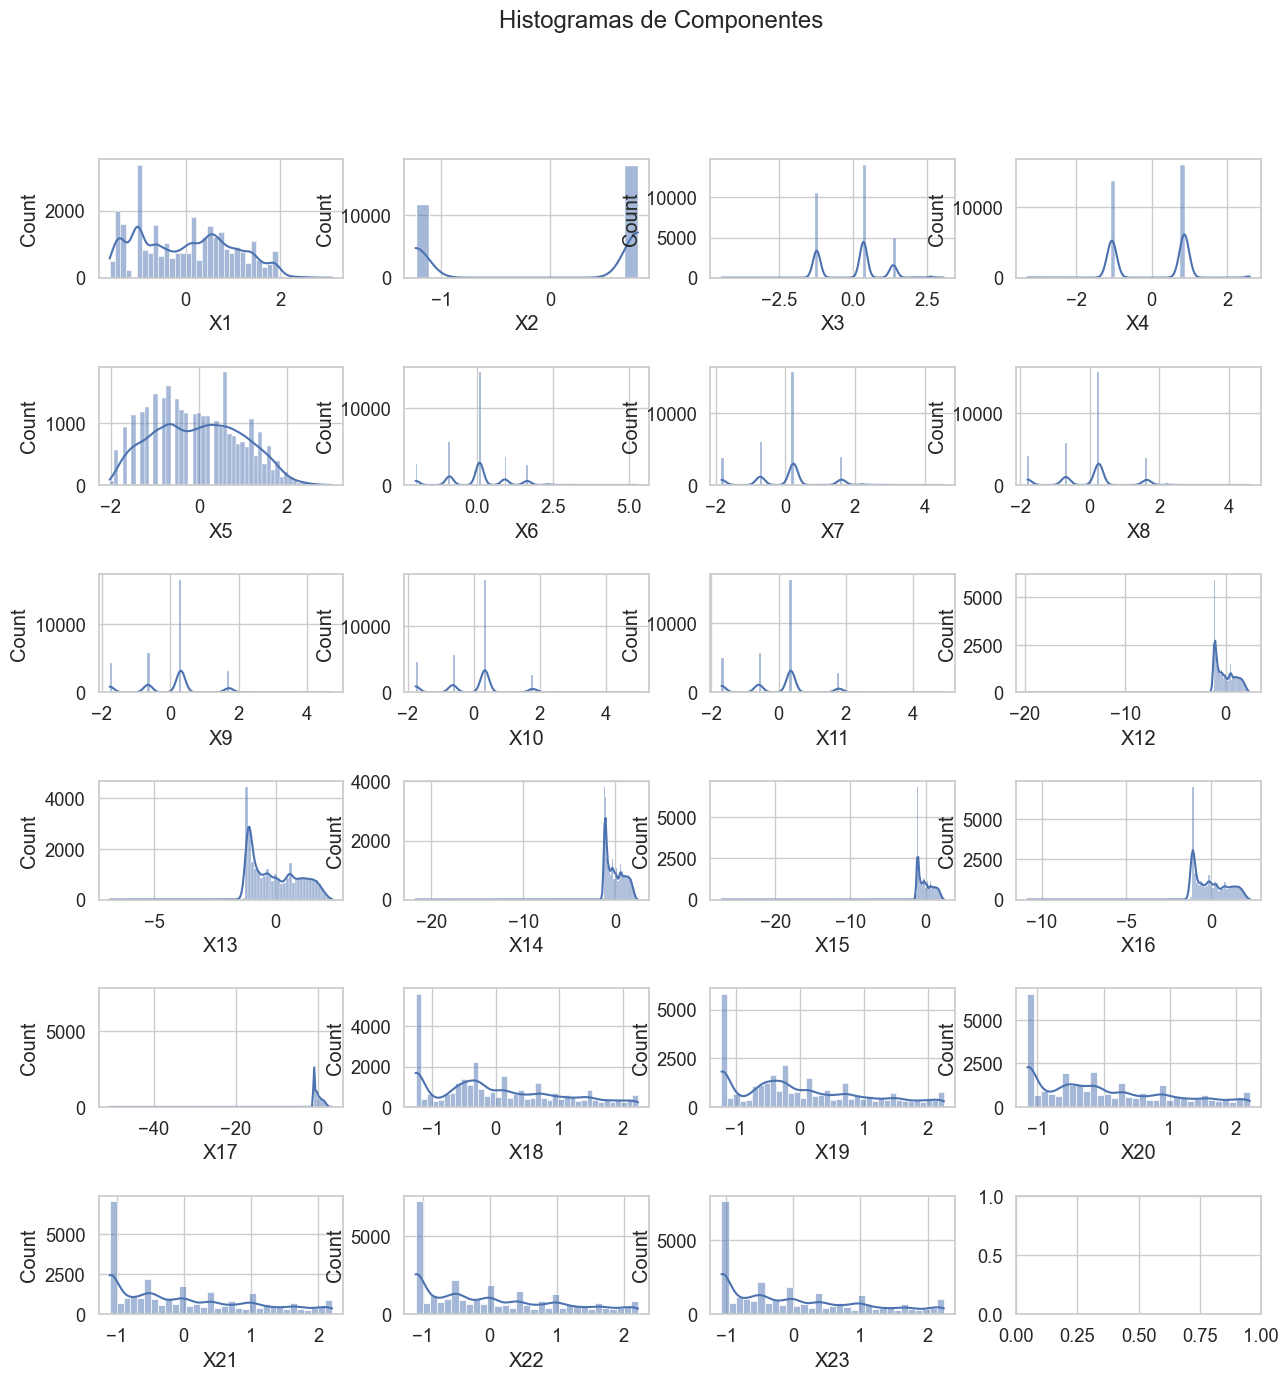

In [345]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
X_escaladas = pd.DataFrame(pt.fit_transform(X), columns=X.columns)

fig, ax  = plt.subplots(6, 4, figsize=(15, 15))
plt.suptitle('Histogramas de Componentes')
plt.subplots_adjust(hspace=0.75, wspace=0.25)
for i, col in enumerate(X_escaladas.columns):
    sns.histplot(data=X_escaladas, x=col, ax=ax[i//4, i%4], kde=True).set(xlabel=col)

plt.show()

### 9. Visualización de informacion en 3 Graficos e interpretación

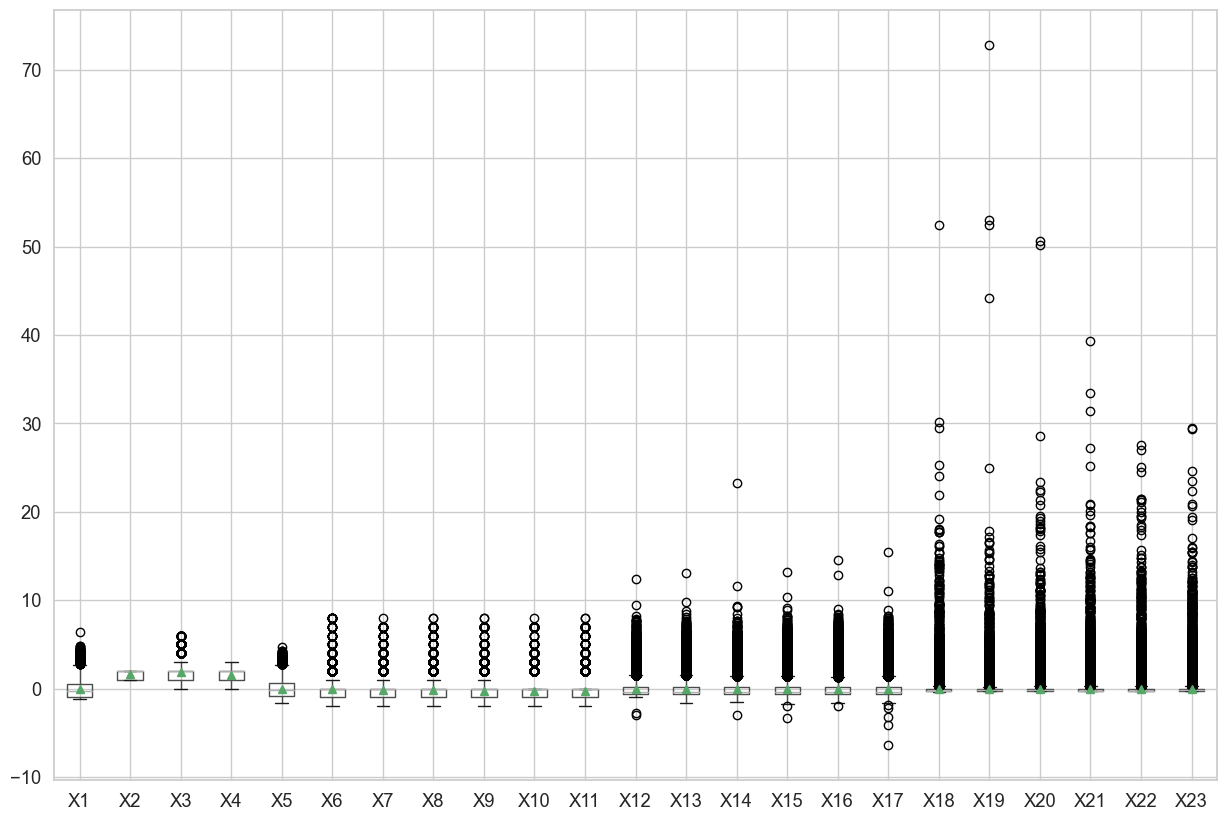

In [346]:
val_atp = X.boxplot(figsize = (15,10),showmeans = True)
val_atp.plot()
plt.show()

In [351]:
corrmat = X.corr().abs()

sns.heatmap(corrmat, annot=True)

In [ ]:
plt.scatter(X, y, c ="blue")